<a href="https://colab.research.google.com/github/KurniaKhaikal/Corel-CBIR/blob/main/VGG16_CBIR_FIXXX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import json
import os
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

In [2]:
from imutils import paths
import cv2
from sklearn.preprocessing import LabelBinarizer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_dataset = "/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/dataset"
class_dir = ['beaches', 'bus', 'dinosaurs',
             'elephants', 'flowers', 'foods',
             'horses', 'monuments', 'mountains_and_snow','peolpe_and_villages_in_Africa'
             ]
IMAGE_SIZE = (224, 224)

In [5]:
# indexing file images
dataset_train = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'training_set', class_item)
    for file in os.listdir(cur_dir):
        dataset_train.append(os.path.join(cur_dir, file))

In [6]:
print("train:", len(dataset_train))

train: 900


In [7]:
print("[INFO] load images Corel-Image 1k dataset...")
#  load images
train_images = []
for image_path in dataset_train:
    if ".jpg" or ".jpeg" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        train_images.append(image)

[INFO] load images Corel-Image 1k dataset...


In [8]:
# normalization
print("[INFO] normalization...")
train_x = np.array(train_images).astype("float32") / 255.0

[INFO] normalization...


In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
modelVGG16 = VGG16(weights="imagenet")
model = Model(inputs=modelVGG16.input, outputs=modelVGG16.get_layer("fc1").output)
model.summary()

553467096/553467096 [==============================] - 15s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [10]:
features = model.predict(train_x)

29/29 [==============================] - 427s 15s/step


In [11]:
dataset_train[0]

'/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/dataset/training_set/beaches/113.jpg'

In [12]:
indexes = list(range(0, train_x.shape[0]))
features_array = [[float(x) for x in y] for y in features]
labels = [path.split("/")[9] for path in dataset_train] # karena path datanya berbeda indexing juga berbeda
data_train = {"indexes": indexes, "features": features_array, "locations": dataset_train, "labels":labels}

In [13]:
with open('/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/dataset/feature_extraction1.json', 'w') as f:
    json.dump(data_train, f)

**RETRIEVAL**

In [14]:
import copy
import numpy as np
import os
import json
import cv2
import sklearn.metrics as metric
from tensorflow.keras.models import Model
import pandas as pd

In [15]:
def euclidean(a, b):
	return np.linalg.norm(a - b)

In [16]:
def perform_search(query_features, indexed_train, max_results=5):
	retrieved = []
	for idx in range(0, len(indexed_train["features"])):
		distance = euclidean(query_features, indexed_train["features"][idx])
		retrieved.append((distance, idx))
	retrieved = sorted(retrieved)[:max_results]
	return retrieved

In [17]:
base_dataset = "/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/dataset"
class_dir = ['beaches', 'bus', 'dinosaurs',
             'elephants', 'flowers', 'foods',
             'horses', 'monuments', 'mountains_and_snow','peolpe_and_villages_in_Africa'
             ]

IMAGE_SIZE = (224, 224)

In [18]:
# indexing file images
dataset_test = []
for class_item in class_dir:
    cur_dir = os.path.join(base_dataset, 'test_set', class_item)
    for file in os.listdir(cur_dir):
        dataset_test.append(os.path.join(cur_dir, file))

In [19]:
print("len to retrieving:", len(dataset_test))

len to retrieving: 100


In [20]:
print("[INFO] load images Corel-Image 1k dataset...")
#  load images
test_images = []
for image_path in dataset_test:
    if ".jpg" or ".jpeg" in image_path:
        image = cv2.imread(image_path)
        image = cv2.resize(image, IMAGE_SIZE)
        test_images.append(image)

[INFO] load images Corel-Image 1k dataset...


In [21]:
print("[INFO] normalization...")
test_x = np.array(test_images).astype("float32") / 255.0

[INFO] normalization...


In [22]:
from tensorflow.keras.applications import VGG16
modelVGG16 = VGG16(weights="imagenet")
model = Model(inputs=modelVGG16.input, outputs=modelVGG16.get_layer("fc1").output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [23]:
features = model.predict(test_x)

4/4 [==============================] - 46s 10s/step


In [24]:
with open('/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/dataset/feature_extraction1.json') as f:
  training_indexed = json.load(f)

In [25]:
label_encoder = {'beaches': 0,
                 'bus': 1,
                 'dinosaurs': 2,
                 'elephants': 3,
                 'flowers': 4,
                 'foods': 5,
                 'horses': 6,
                 'monuments': 7,
                 'mountains_and_snow': 8,
                 'peolpe_and_villages_in_Africa': 9}

In [26]:
import statistics

query_indexes = list(range(0, test_x.shape[0]))
label_builder = list(np.unique(training_indexed["labels"]))
class_builder = {label_unique:[] for label_unique in label_builder}
recalls = copy.deepcopy(class_builder)
precisions = copy.deepcopy(class_builder)
y_pred = []
y_true = []
# loop over the testing indexes
for i in query_indexes:
    queryFeatures = features[i]
    results = perform_search(queryFeatures, training_indexed, max_results=12)
    labels_ret = [training_indexed["labels"][r[1]] for r in results]
    labels_ret_mode = statistics.mode(labels_ret)
    label_true = dataset_test[i].split("/")[9]
    label_trues = [label_true for _ in labels_ret]
    label_trues_mode = statistics.mode(label_trues)
    label_true_encode = label_encoder[label_trues_mode]
    label_pred_encode = label_encoder[labels_ret_mode]
    y_true.append(label_true_encode)
    y_pred.append(label_pred_encode)

    ## Kode dibawah tidak diperlukan karena untuk mengukur metrics diperlukan y_true dan y_pred
    # recall = metric.recall_score(label_trues, labels_ret, average='weighted')
    # precision = metric.precision_score(label_trues, labels_ret, average='weighted')
    # recalls[label_true].append(recall)
    # precisions[label_true].append(precision)

In [27]:
len(y_pred), len(y_true)

(100, 100)

In [29]:
import matplotlib.pyplot as plt

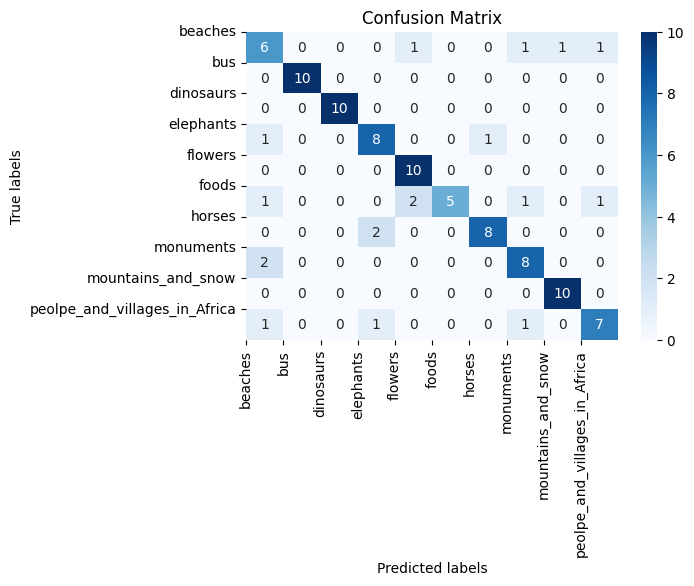

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.yticks(list(label_encoder.values()), list(label_encoder.keys()), rotation=0)
plt.xticks(list(label_encoder.values()), list(label_encoder.keys()), rotation=90)
plt.show()

In [31]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10
           3       0.73      0.80      0.76        10
           4       0.77      1.00      0.87        10
           5       1.00      0.50      0.67        10
           6       0.89      0.80      0.84        10
           7       0.73      0.80      0.76        10
           8       0.91      1.00      0.95        10
           9       0.78      0.70      0.74        10

    accuracy                           0.82       100
   macro avg       0.83      0.82      0.82       100
weighted avg       0.83      0.82      0.82       100



In [32]:
## Dosen't need to run

# print("recall values:")
# comb_recall, comb_precision = [], []
# for key in recalls.keys():
#     average_val = np.average(recalls[key])
#     print(key, average_val)
#     comb_recall.append(average_val)
# print("combined recall", np.average(comb_recall))

# print("\nprecision values:")
# for key in precisions.keys():
#     average_val = np.average(precisions[key])
#     print(key, average_val)
#     comb_precision.append(average_val)
# print("combined precision", np.average(comb_precision))

In [33]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model
import numpy as np

# See https://keras.io/api/applications/ for details

class FeatureExtractor:
    def __init__(self):
        base_model = VGG16(weights='imagenet')
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

    def extract(self, img):
        """
        Extract a deep feature from an input image
        Args:
            img: from PIL.Image.open(path) or tensorflow.keras.preprocessing.image.load_img(path)

        Returns:
            feature (np.ndarray): deep feature with the shape=(4096, )
        """
        img = img.resize((224, 224))  # VGG must take a 224x224 img as an input
        img = img.convert('RGB')  # Make sure img is color
        x = image.img_to_array(img)  # To np.array. Height x Width x Channel. dtype=float32
        x = np.expand_dims(x, axis=0)  # (H, W, C)->(1, H, W, C), where the first elem is the number of img
        x = preprocess_input(x)  # Subtracting avg values for each pixel
        feature = self.model.predict(x)[0]  # (1, 4096) -> (4096, )
        return feature / np.linalg.norm(feature)  # Normalize


In [39]:
from PIL import Image
# from feature-extractor import FeatureExtractor
from pathlib import Path
import numpy as np

if __name__ == '__main__':
    fe = FeatureExtractor()

    for img_path in sorted(Path("/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image").glob("*.jpg")):
        print(img_path)  # e.g., ./static/img/xxx.jpg
        feature = fe.extract(img=Image.open(img_path))
        feature_path = Path("/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/feature") / (img_path.stem + ".npy")  # e.g., ./static/feature/xxx.npy
        np.save(feature_path, feature)

/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/0.jpg


1/1 [==============================] - 1s 955ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/1.jpg
1/1 [==============================] - 0s 471ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/10.jpg
1/1 [==============================] - 0s 479ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/100.jpg
1/1 [==============================] - 0s 454ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/101.jpg
1/1 [==============================] - 0s 448ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/102.jpg
1/1 [==============================] - 0s 447ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/103.jpg
1/1 [==============================] - 0s 456ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image/104.jpg
1/1 [==============================] - 0s 457ms/step
/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel

1/1 [==============================] - 1s 562ms/step


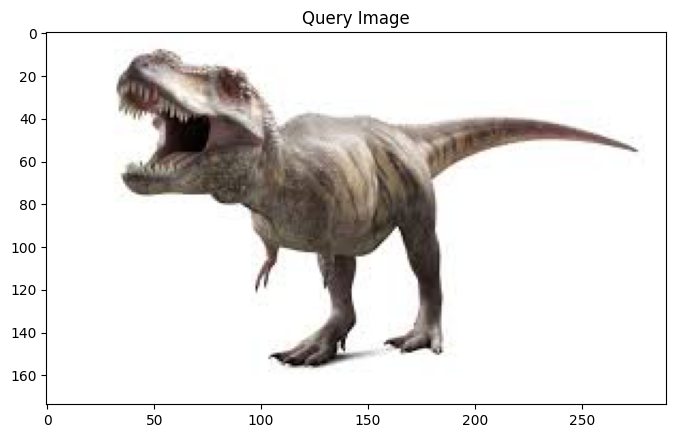

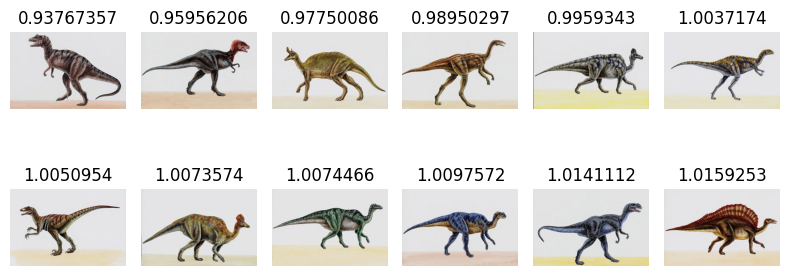

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# from feature_extractor import FeatureExtractor
from datetime import datetime
from flask import Flask, request, render_template
from pathlib import Path

# Upload
img_name = "/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/upload/trex.jpg"
img = Image.open(img_name)

# Read image features
fe = FeatureExtractor()
features = []
img_paths = []
for feature_path in Path("/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/feature").glob("*.npy"):
    features.append(np.load(feature_path))
    img_paths.append(Path("/content/drive/MyDrive/Corel-1kNew-R2/PROJECT-TA/Corel-1kNew/image") / (feature_path.stem + ".jpg"))
features = np.array(features)

# Run Search
query = fe.extract(img)
dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
ids = np.argsort(dists)[:12]  # Top 12 results
scores = [(dists[id], img_paths[id]) for id in ids]

# len(scores)

# Visualize

import matplotlib.image as mpimg
fig=plt.figure(figsize=(8,8))
read_image = mpimg.imread(img_name)
fig.tight_layout()
plt.title("Query Image")
plt.imshow(read_image)
plt.show()

print(" ")

axes=[]
fig=plt.figure(figsize=(8,8))
for a in range(12):
    score = scores[a]
    axes.append(fig.add_subplot(5, 6, a+1))
    subplot_title=str(score[0])
    axes[-1].set_title(subplot_title)  
    plt.axis('off')
    plt.imshow(Image.open(score[1]))
fig.tight_layout()
plt.show()

# max_hasil = 12
# hasil = [imgNames[index] for i,index in enumerate(rank_ID[0:max_hasil])]
# print(" ")
# fig = plt.figure(figsize=(10, 10))

# for i,im in enumerate(hasil):
#     fig.add_subplot(3, 4, i+1)
#     plt.axis('off')
#     plt.subplots_adjust(wspace=None, hspace=None)
#     img_result = mpimg.imread(base_dataset+"/"+str(im, 'utf-8'))
#     plt.title("Hasil %d" %(i+1))
#     plt.imshow(img_result)


# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         file = request.files['query_img']

#         # Save query image
#         img = Image.open(file.stream)  # PIL image
#         uploaded_img_path = "static/uploaded/" + datetime.now().isoformat().replace(":", ".") + "_" + file.filename
#         img.save(uploaded_img_path)

#         # Run search
#         query = fe.extract(img)
#         dists = np.linalg.norm(features-query, axis=1)  # L2 distances to features
#         ids = np.argsort(dists)[:30]  # Top 30 results
#         scores = [(dists[id], img_paths[id]) for id in ids]

#         return render_template('index.html',
#                                query_path=uploaded_img_path,
#                                scores=scores)
#     else:
#         return render_template('index.html')


# if __name__=="__main__":
#     app.run("0.0.0.0")